<a href="https://colab.research.google.com/github/gjurcin/transfer_learning_CNN/blob/main/Workshop_dog_breeds_gjurcin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 

You have a data set with 133 dog breeds.
Build a neural network classifier that can learn how to classify 133 dog breeds.

Your task is :

1. Preprocess Data
2. Define neural network architecture
3. Use some of the layers you have already learned in order to build your model:
 * Dense layer
 * Convolutional layer
 * Batch Normalization
 * Dropout
 * Min/max/avg Pooling
 * Global Min/max/avg Pooling
 * Flatten
  
4. Use some the techniques you have already learned in order to train your model
* augmentation
* model checkpoint
* learning rate decay callback 
* early stoping
* transfer learning

5. Evaluate the model 

6. Try your model on some test data


# Rubrics : 
The task is considered as solved once you get >=70% accuracy on validation data


# Download data

In [ ]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2020-06-30 12:52:25--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.8
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  21.4MB/s    in 52s     

2020-06-30 12:53:18 (20.7 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



# Unzip Data

In [ ]:
!unzip -q dogImages.zip
print("Data is unzipped")

Data is unzipped


# Read data

* (train/test/valid)_files : list of image directory locations in folder
* (train/test/valid)_targets : one-hot encoding based on folder names
* class_names : list of folder names

In [ ]:
from sklearn.datasets import load_files  
import numpy as np
from keras.utils import np_utils


# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    class_names = data['target_names']
    return dog_files, dog_targets, class_names

# load train, test, and validation datasets
train_files, train_targets, class_names = load_dataset('dogImages/train')
valid_files, valid_targets, _ = load_dataset('dogImages/valid')
test_files, test_targets, _ = load_dataset('dogImages/test')

Using TensorFlow backend.


In [ ]:
print(train_files.shape)
print(valid_files.shape)
print(test_files.shape)

(6680,)
(835,)
(836,)


In [ ]:
print(len(train_targets))
print(len(valid_targets))
print(len(test_files))

6680
835
836


# Remove the numbering of class_names
001.Affenpinscher -> is converted to Affenpinscher

In [ ]:
class_names_processed = list(map(lambda x : x[4:], class_names))

# Implement load_image method

* Read Image
* Preprocess Image
  * Resize
  * Preprocess_input

In [ ]:
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.applications.resnet50 import preprocess_input
from keras.applications.inception_resnet_v2 import preprocess_input

def load_image(path):
  # READ AND PREPROCESS IMAGE HERE

  image = cv2.imread(path).astype(np.float32)
  image_resized  = cv2.resize(image, (224,224))
  image = preprocess_input(image_resized)
  return image

def load_dataset(files):
  vector = []
  for i, file in enumerate(files):
    vector.append(load_image(file))
  return np.array(vector)


train_X = load_dataset(train_files)
test_X = load_dataset(test_files)
val_test_X = load_dataset(valid_files)


# Visualize preprocess Data 
  * Don't expect natural picture visualizaiton because files are preprocessed

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

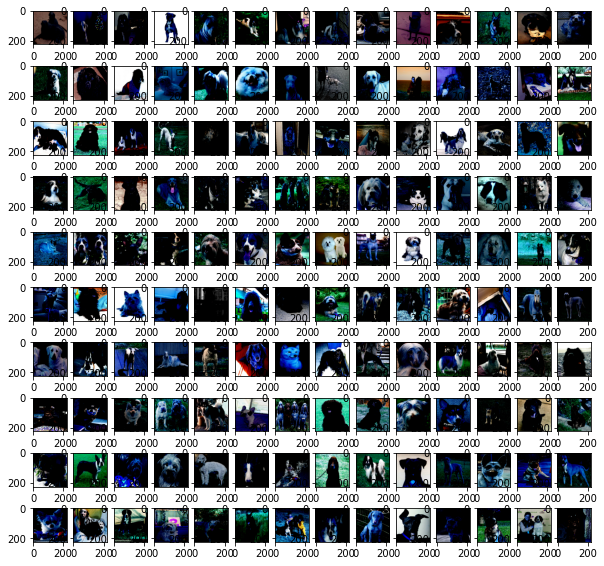

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

for i in range(140):
  ax1 = fig.add_subplot(10, 14, (i+1))
  ax1.imshow(train_X[i], cmap='gray')

plt.show()

In [ ]:
broj_na_klasi = 133 # broj na klasi

# Create your model architecture

In [ ]:
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet169
from keras.applications.resnet import ResNet50
from keras.models import Model
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
#from keras.applications.resnet50 import ResNet50
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet169, DenseNet201
from keras.models import Model

model = DenseNet201(include_top=False, input_shape=(224, 224, 3), weights="imagenet")

for layer in model.layers[:-2]:
  layer.trainable=False


#model.add(Conv2D(256, (7, 7),  padding='same'))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(512, (7, 7), padding='same'))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(AveragePooling2D((2, 2)))
#model.add(Dropout(0.2))


flat = Flatten()(layer.output)
class_ = Dense(1000, activation='relu')(flat)
outputs = Dense(133, activation='softmax')(class_)

model = Model(inputs=model.inputs, outputs = outputs)

74842112/74836368 [==============================] - 6s 0us/step


# Print summary of your model

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

# Compile your model

In [ ]:
# COMPILE YOUR MODEL HERE
from keras.optimizers import adam

optimzer = adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimzer, metrics=['accuracy'])

# Train your model here

In [ ]:
# FIT YOUR MODEL HERE
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        )

datagen.fit(train_X)


checkpoint = ModelCheckpoint('best_model.pt', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

model.fit_generator(datagen.flow(train_X, train_targets,
                                 batch_size=32),
                    epochs=100,
                    callbacks=[checkpoint],
                    validation_data=(val_test_X, valid_targets))

Epoch 1/100
209/209 [==============================] - 83s 396ms/step - loss: 3.9088 - accuracy: 0.2087 - val_loss: 2.8214 - val_accuracy: 0.3964

Epoch 00001: val_accuracy improved from -inf to 0.39641, saving model to best_model.pt
Epoch 2/100
209/209 [==============================] - 64s 308ms/step - loss: 2.1310 - accuracy: 0.5686 - val_loss: 1.8128 - val_accuracy: 0.5868

Epoch 00002: val_accuracy improved from 0.39641 to 0.58683, saving model to best_model.pt
Epoch 3/100
209/209 [==============================] - 64s 305ms/step - loss: 1.3181 - accuracy: 0.7425 - val_loss: 1.3718 - val_accuracy: 0.6707

Epoch 00003: val_accuracy improved from 0.58683 to 0.67066, saving model to best_model.pt
Epoch 4/100
209/209 [==============================] - 63s 303ms/step - loss: 0.9124 - accuracy: 0.8278 - val_loss: 1.1425 - val_accuracy: 0.7078

Epoch 00004: val_accuracy improved from 0.67066 to 0.70778, saving model to best_model.pt
Epoch 5/100
209/209 [==============================] - 

# Load Best Model

In [ ]:
from keras.models import load_model

# LOAD YOUR MODEL HERE
model.load_weights('best_model.pt')

# Evaluate Model

In [ ]:
# EVALUATE YOUR MODEL HERE
score = model.evaluate(test_X, test_targets)

print('Test accuracy:', score[1])

836/836 [==============================] - 6s 7ms/step
Test accuracy: 0.7619616985321045


In [ ]:
def get_prediction(image):
    image = np.expand_dims(image, axis=0)
    
    # istreniraniot model go koristime za prepoznavanje
    prediction = model.predict(image)
    # prepoznaenata klasa ni e indeksot od najgolemata vrednost vo izlezot (prediction), najgolemata verojatnost
    predicted_class = np.argmax(prediction)
    return class_names_processed[predicted_class]

In [ ]:
import urllib.request
import cv2

def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # PREPROCESS YOUR INPUT
  image_preprocessed = preprocess_input(image_)
  image_preprocessed = cv2.resize(image_preprocessed, dsize=(224,224))
  return image_preprocessed, image_

def predict_url(url):
  image_resized, image = url_to_image(url)
  predicted_class = get_prediction(image_resized)
  plt.imshow(image)
  plt.title("Предвидено : " + predicted_class)

# Your model should produce outputs :

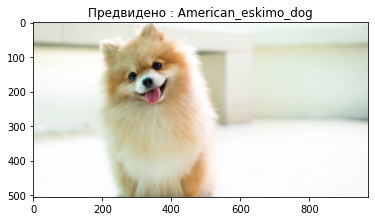

In [ ]:
predict_url("https://d17fnq9dkz9hgj.cloudfront.net/uploads/2018/04/Pomeranian_02.jpg")

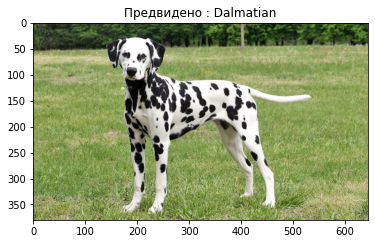

In [ ]:
predict_url("https://vetstreet.brightspotcdn.com/dims4/default/743d415/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Fee%2F140380a73111e0a0d50050568d634f%2Ffile%2FDalmatian-2-645mk062311.jpg")

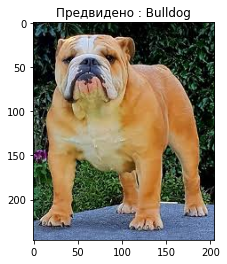

In [ ]:
predict_url("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhUXGRsaGBgXGB8YGBoeGhgYGh0XGRoYHiggGBolGxgYITEhJSkrLi4uGB8zODMtNygtLisBCgoKDg0OGxAQGzAlICYtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAPYAzQMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAQIHAAj/xABAEAACAQMDAgMGAwYFBAEFAQABAhEAAyEEEjFBUQUiYQYTMnGBkaGx8BQjQlLB0QczYnLhgpKi8WMVJEOToyX/xAAaAQACAwEBAAAAAAAAAAAAAAADBAECBQAG/8QAJxEAAgICAwACAQQDAQAAAAAAAAECEQMhBBIxIkFREzNhgQUjcTL/2gAMAwEAAhEDEQA/AOY+D6Brlx7fvCLeNxAncvxDkQDgZMRnnipLiAXWFlT5Z8xlrjmOc/DmIAj17Bj7P7U0r3GuAIzEssyRtxtjqzflQqeLzae9CzbbaEmGAeCCT14I+lEcV1Fu03J0Knt7v3lstCwCDl4EgN5REQFB9adeA6E/v7lwAsqkpMMZgknHzHHrUHsnqLZV0wjbT/FEg9jzuBoO3qmtXGsKwKswUsB5nUx5ZPEzE9JNVpKmWfZtojZz7oMZIa4zEmCYVVnnrmYiOKisXQfiTBxKnaR9J2zxiBPemnjWjKuls8uXwPhWZBCjoJI/ClNrT3cMAf5SOojG0jqKE9el18loI1+hQLuBMkDYVko/eZMo8GY4BB9KX2k5zBAJzxAB/HiKu/hXs3q2Tb+yX2VsiEYFSOq7hB/XNB6v/D7xTcW/ZrsGc4HJJiN09ePpUdkSoT8oqulAJYvuhRMDqTxJ6CpLMuRubykyY6GMA/IdKtdr2E8RcXVGkv8Amg5AAMHGT9etCn/D/wATTcBpXzjDWz9wHq1k9JCnwHL3c/CpbntI/qKB06TK7ip9ePkRTHU+yWvsSbmlvLGCfdsR85AI+s0qvakscjMRI64gH51Cq9EOEkwdiQefxqVrjLnccgiQe+DWHslQrchs/YkEVrJI2gYJnjsDwe1WLEe496ktIS20kg1oVzBrNwHk8nP/ADUkhTXSQCG88kHpgjBod0Yc/nP5UXasAr0B5IJAJ+U8wBWL1vKkq0QJj1GIniosonQI1xoA/WaY+GWgdyNK3OVmYJAnawqC3aQSGMgcsokA9DnkTisWro3AszSAIPPHGegqGdLaJrmndgWkhEmAW4kk7R3Ehs+lDuQyAiQywCO4jkR2I/GmvhWutKx3EkbWGREQGYif9RMdOk0vLiS0593+MbQPoPyqUQm/s9aDMPdTIncAJMHbyI5mcj0oeyzK42knOCJn6RmtdJqWtsHUwRH4Gf6U88Fv2rae8c7ZaFHO6JzETAn71xMm0SPrCmnKquWI/eE7dnHlTMl8x8vnTW77nTqov22uXWyxB2qDjyiCJ59fxpAANTcB3YG5mXghVOAOhJkfjTjQaNb6k3r0MGI8zDiBAAPH5yTNQlSASWkiu30hNwLAEkdlPqMz2xHWlxplqdKyopuE5yik8AgHcew9KCtWS3r/AH7VdeDCaI1npV89j/Ze3futcvu5S0qGEYBndi5HmIMAbGMx2qj3F2tnERxnoPxrp/sNbm2VSC10qNwPQKSJ+RZ59ZoeaVLQXFHtNFq0Hsho9Qy3/fXyirAQhQFLRI3FZZjAkhcAVbNLZ01ldmntjyYLA7BPZ73xsRiQCe0dldtQipbSQqCPt1+ZNaHVJvCucDA3SUHHlVfhJ7seppJXKVsacUlod6Mbjudy5HRZC/0JNE6myjoVYGDt4JB+IdaE02pQeUdMdo+1FOfzH4MD/StSCio0IzcnKyDWvtUIh2kzzJgDmPWSM+tKv2Ujg3GH8sK4/wDIz+NNNam4qO0knsKD1N+0uJI+X/NK8hdn/CGMEuq/k9p7oGQSIPygnieopVq/ZvRm618ae0LzZLOm9CerC2ZQOeZjP1JqZPEAXKmH2gebAcA9D0K+nFHEAjB3D9YPalezXgzS+yseL3tKPI1nTXC3Q6e2onuSAT+NV/xrSaI7VOmtAMJ/dqEaP9LDg9vxBph494IzahQCQh8325qu+LAi8DMiIHpGI+f96Gpyv0I4QopHjPh5s3XSSVU+Vu4YBlJ7EqRj50KmnZpjMCeenbP2+lO/bFzvtmebQB/6blwCfoBSH3JO0jhjAJ4nE/mPvWlF2rMuSp0HWr7sbm3O7liIKgRnsMYojw+0wt/CHF0jaGMA+7Mtz6GOZzWuiB9wybgAXgiM8DLRkjoPUmtL1tQiruCmJzO3/dOdpwO88dKkGzaxpTbuKr4LSIInBlTPpFbm2oO28vmXmIGOxIOTHy7dcaanXvKG6CzplWgeYSCM/wAQBBz9Kiu65bm9mG0ncwiSCSSYPbmJFVaZFSJNNpAzHEcQBA7wRvMGYGJnnms6vSIqrb2kX5O4yYmJ2ERkzGR3+VbeIaQlFayd1u2FBI580t5h0yWGeDPpWhtX4ts8DYBs3jO0npHQTME4nFSjl/0A0jKCd67gRHJBHqCOo9ek0x8QKvdZ2yDt+EkBYjcIKicSB/Witb4jZUBbVqcklnM7i0BiEMhfTrxQmp2qXDfEmIGQTIBhoiAZ59Oaht/RDk3tE/gWjG5L0oQnndSZYKG2mQOuQR9DQZ0zuzNGCceokicdMc9YovUaJG03v7TlSPK9s8yxAMEcjjBpsbsQuntSIBYIpME9Gxzg1z8KuVbEOo0zMoK5EGIyTtMMfyMdqG8N0xdsEAjIB6xTbTqDcS3busOCpT+Z4ZxIyI2xB7GhGuPYvZQMZMyIDTzEcSCD9aJH+S96pAGt1DOxLABszAjM9fyrr3+Hem26e00R5PKe5YyT+MT61yzxPYwR0nc07x2PAH1An1k12L2TsN+waWcH3YP0JYr/AOJBoHJfxG+Ntja9rlWQWiBJqo+Ie0ltrxVCGJgCDiZwPuRS72o0OqLEFzsaCdgztnPmPXrHHHzqz/4Y+ytvTIt91D6hgWt7h/lIeGjMOwg7swCAOWmmPAnVsJPLT8LR4N4dcCKWkYyz+UfQfER6xHrTnaMS4kdlmfxqu+0vtEmnQs77mOFUNkn59B6/1xXKdd7SX72oAa6Su1iwEqEgGIHHO2nMeOKFZybO6Xrc8OM9wR+U1Sva/Q3gNwUjbncp3L/1RkD1IFUDw/2iv27yxf2LsVgrNCsT3UmDnsK6j7P+NjUqMwwwR2PUHP6GetD5GJNaL4cji9nOLftVtdmZH/dgK8DgknDfb86sPgftSrum0jaRB/qP12rT/ED2Rt3A1+2nu71sAuo4dON0RAZRmQIKg9qQezfs0HLNBXb8Md/ryAIHrWflxwUe32PY5ybr6Oma4BvpH2bH6+VUL2g8N90pKtKo+QcEF+GPcHAn+9XHQTtG7lf3b+qE4b6MRj/X6VVPbo3DbDYCtdFtyeFe2CFDehz9UoUPlJF5/CLspGvD3bkLEKsSYgMZbt6xVfNoiQRxP4c02a2928baKEliD12xkyw9Zj5xUOstvauRcllG7buwDys84yBPyrUjpUZLbbbNdCoRdzKG3NAE5gHJgcHoCfX51Lr9QpuHdmDHlwoAkbQP6/nQFtionpwM0X4DpRcujcJVZJwSvoGI+EE9TXPZVq3Z7eHTYWJVSfdhjG2Tn0WQPlNRpYggbSSZ8p6gSSQfl+VF6UKC1wpuZSGEsFVeokczI+GttPqpMjYEAM7wApcjoBncBxmZAMiahM5MI8N8Ts27T20W4TcABjuD8S5nI/hI560HqvES6FAUOS27bteNxhZ64MgD+lFwVusbsKwbZDkhzuJG8G3G7ackjuMEGhP2YLcPlYBDGcMSDBgRjMwCD2Ndf5K6u2a+FWYcByJwQpDMGDEqwhJIMEmOcY6SbpvC9yXGkOASu4cNwdwnoQOves37FywAboAbYy2wDFxdxJm5t7AsP+oDpgPwnxZrANuQVZ1LAyR5T0Iyp9fSuasiScv/ACbXWbThrcbkcIzD+Vo3LtYfCwDfjW/h1i5dBa1ZuXmnzEywH8okcnmfpUup0Qv7hpSDbL7mViFKE+UZPxJkwRmOQKjv6T9nhLl1X7BAXC9T8e0AmQcTU/RZO1X2KuCIOfTEZP48ZplbLXVB+JkQgH1Y+UHuQJ+1JicmiDqW2e7GBMnvIBGfTPFWLtE3h2rADI0jcMMvxKRMHHIMwRXffZ7TldHp1PIsWp//AFr/AHr53098o25TByJ+Ygx9DX0f4Te3aSw/81i033toaFmjoLjdMB19kMQp4J57Dk/hNP8ATWfIJxuhmHEyMKT0VFgR1M96U6i0SsiNxG1e25/KJ9M/jTbxDULbR2J8iKSe+1RP3MfcgdK7iR02y+eVtJFW9qLwLizZl2RC1yFAKgDcWLcKNvaOg9KomruWyDumIM+aOn40X4r45e1bEs5W2uAFEL8lH8TD+ZpifpQVi+qfDbRiGDbriLcYFWUjLLgSBIEA5kZp9OkLNbMeHQVQgwdq85AkA4n510D2b8PstLi2FePOUwczF22RBBBBleueYqoaXwe7qkN2wlsMCQdsWgzEk7SDgnIMgwN0dIDX2G8QK3mtMWS8shbZHxMuWt9CrwJXMHtxNZzg1RKhJbL1qrLFCHIfYpZHGNyx57br0wCcYOOJIpJ4fY92do46GrKArYyA3GIgkfCR0BGQPn2pYNKYHcY+oHH67GsnlYm2mh/j5Uk0zHugXAPw3FKt9cT+M/SsaA5uqwjc24jkSVUz9zUt4R7vv5vw2mhku/vnjsp+uR+QWgV1YVNyD11DJjiOIwI+VbtqpEGCCOoBH364gVqhDYP0oa/bA5+8YPzHfrNMrLRT9NMjbSafcH/Z7G4fxe5SY9DFFe+WMMw9FMfUDjvjHTmgDzBP6/rWXHXg/rPp86iWS0SsSRB4/wCAWtWu28gcxC3R/mWyepBjcMCRJn0rlvi3stet6h7V5rfukXcrxtVlgnyhRIJ4PqM8V1mzqzOST6n+pNR+O+GrqrexiJBlZEjkEox5CNAnb+PFdjyUwWfC3HXpw3xS6Hh2M3H6jJwAgkdCSp/PrU+ovKbCbi3vydhGTPZ2ZjjkiP8ATOKb+NeGtave9vpHme0YthRaKopVhbUw4CsGUyd09CsHQaALaF1Vt39zAKu/d5oY5trhiBkgkRnHSmPTNlppNCrWXC173Vr96QYkid2zJjrB2kk9qg1HhwZHuqQoDZUmcM0AIf4onjmM1I1uQXCgkMPNaAUCRBXZ/GD9ODkzU+qR20+4C29tmgQDuVokfDABjvMycHmrfeifGqI/CLwttcQsNokoPL5nwign+XMnpANMNZYFu4QbaXCVUn3kuQTJJxAUmRgTwM1XNHd2OHKBsgjcJGGGc4IkQab67xVnYxeCeZiQqlTJPJKzOAoAnAEdyekvwRKD7aFItOjtA+ElSYkZnGe4mtDbYxiZxgTMRwBTm/rwyi2ltcEb3Il3I5LEcCJwO1MtPYPuw7KQbcARtUkL5jtZucTieM+lTZftYkXw+1taC5cEAbxtUyeYIlY9TmenXsXsLrWueHorf5lke5Yf7cp//Nk+1ckUB2Yq+1gTtW5MnOACBDNxj7TXZPZ7SfslpLE8LDHvcOW/8pA9AooWSX5DYk3bQyuvFyymMOn/AI+dj8gFJqp/4leJvuTTIY3BS2P4i0KPXbE/X0q0aDzOLh6KB38xIn8AR9a55qmN7xNesNuz2H6FFXxxnLcy0WvANMF2BW2IEG3dgkCdx6yTJOepqv67wVv2r9xb91tHJ+BiyvhMEARjb0zNXEvtYjkMoPpK/wDDc+lBeJXMIwyA6nHYnafptYmlnna+x+GOMvo38Fs3EsBLgUMA3wcDJ2zAAmImO1KvH/D/AH13S3lIR2IQtkcAuhkZ3AjaP9w7U805PBME5/XagfFtL7zTFRzGIxBEEEdjIoSy/IvNx8LL4WXNq37whrgQK8GQ0ZiT1/iB7z6V69f2sQZiT9iZHy/4NIfYrxBr1qbjkuha23GTKurn/UAxWeuaf+KWSQr87T5sxKnJP0P501JtxsR6pSoj1jwsnO14nuCpgx34pANX+/udQCq/9qgH/wAppvomZwgbidzH0HH51XfDQCS/85Lf9xn+tZeee7NDjx0yx6a7manuXvL37f2mgbYI4ra03SpjktUS4bsiuiD6Hj09Knt8dPl/StrtqVI+o+dDae6Rjr2NEjL8nNaIrvxCiUun5VBeMwYH6/XNa+87VTt1ZbraI/ajwgaq17xUDX7QO0R/mKVbdZacGQSV7N8zXKXNu1+ztZI3MjBgfillK+8IHJgsBPWux6e8QRH69a5h/iH4EbGrGotBRbf97B6MGHvBHUbmBjmGFO4ciaozuVhr5CLw7TXbKm4HNsEwrc5BG7A6cj5iodL4s+nbyhdjGWAxuB5SRkCZgfwnIptb9o1NolrKtDi5E+Wd25lIJwpgcfzGkSaMh5ugKDkgiCNwMEA/rimP+iEb33B21cs5id3G47mGZ5PXpNMdH4b5Q24MWEmM7f8ASZiGHUZ5Fes6K3DFCxAxvZSFUt5RkH14PpUmhs7AQzMRMr0ESRMHvH4VWb1omclWifSeBbbjb2YhZZ/dqSyoCZckwqjykSWEHviYLbXHvPecMQEdsNBRSGCiTJB83HOZpyfG0m4jEqXtEHJYMHXeFO4zOFI/3kUo0/itwIdPC+7uYJyxWTiJPljjtAHaiUW3bLB4P4QD4npyVBRyHGZg213lvUHaM+tdMv2Zn1qhf4e6YpcBJ8iJgcwzBQxBIwDDY44710V+KS5Ek5aHOMqgVfxbxz9nDKf4iSCevE57/wB6qfs94itzxD3jGJUweAT5cfYE/Srf4/YVrZVvhMyPvSLwL2St3Gdg5AQLA2iTuLdZ6be3WujnTj1ZeWLq+yLTqteoYFSGI5AzE9JHWPrWVZWDDMcgdu/y+XzrTTeHoihAIA49TznuetZCwRtOaRctlvPAhiAMA8QD/eh9PePwwIz15NT6liVz0zS5be8xFSmQD+Ev+y37m8xbuFSCR/EMTjoQ34Cra2tV0hMkggZkCR1/Ckum8M3FBcLOEPlDcDM5j4j85p4FC8Uws7So5xT9AfGLnutM4BhmGwHr5sE46hN34Us0SSF+VEa+97x9vRfx9aj0421n5J9pfwP4Y9Yhd27twDmpNNgUHbMt6Cit1TGf2WaC1uUBrEhsY6g1OjVprh5Z6iixlZSqYNeOSO4DD6yCPuDUatWC24fLP35/p9qiskk1XIwmNaDbdw0L7U+F/teluWR/mAb7X+4fw/JhK/btW60XpXP2omDI0weaCaOD6q4ExbB2ZEssbjBBn78dMVvYUqtsk7i5IVVJkQQAWwZ6wKsf+JHg729Q9xAfcuRd58qtckN5f9y/lQPh3hh2C6GDtMW4PRCNzEfYZrYi+ytGDkfTTNNT4bcX3aORYQkAhnBiQAWaOOuDgT0rGqcWTsgbgIYEQcElWM4kqw4JmJNSeP6pLl4ruLSwWQCNoDZYiPNuEkAcCKM1Wm0/lJNy4ANg33FV1CkwGAEj4sT0+VRKgV+djfx3w9Bad2gupgBV2lkILB2cTDA7lKmZG3oKS2fFrgRnJBUuIWAJMAsZj+UAfNpp+dIfd3k90SBbXzyXKF03xtbIUJuwBj3fPNB+H+DK93TIm4pgkmMkgFyMfDAaPSM1ZtJWw0N6OkeF6b3YGInJByRIG1STyVWAfUGnaZFDm31+tbq8VkOVu2a3VJJIV+MaUEGB9aX+zLm1fKkYuIV+qkMPwDferFdthqA1GiEgjkZ+VCUmmWauNMM1Q3RGMzNB7CHz8waJOrAWWGfz+VReF3muEll2zwOwBx9f7113IC06N7iSOtY0FoAmmB08ioxpyDREqYHbJ7BrF9pryWa3upXT2i6F5gyRzQd81JrWg4NDA+tIyezQxLVhtkYFSj0oTT0baFWiWejxUisX+BUl2g7lzpRIuivpDp7fmYdpH5VBpT3ovT/5vowA/pQdlIEdqtk8TLwe2EsKktEjpH0/rQ6uT1rYtFVhKmTJWV7/ABRf/wC1tmTBubSfpvAP1Umue+H6w6d93KPAdI+NDkgEjB/vXUfaax77SXBsDlIuBTMHbuDcEZ2sSPlXKdWCVksdqAC2p+LzQenSMz6iK2ONPtAxOXCslfk0s3kDOG37ZJSIJBnG4nPw0VrNSobaAt1QBDHcZnJPQzwDM/DSpJ6VcfZfR2LlrzgF1gEsdo6wqwfNHUnv6Ud1YpNqPyYQly7aFy0TJ1AKXSP4diq6mQTEe9URg5zkVH4Dq0tLYN0y51CLbA4VQPjmZjzrgjiOCKxqbgDAqVNsKbiWr4I3IWiAbY2s08HEjpmCo8YaXsBV2AZUdiWkDgcDb9xUVaovjezuFqCKivaeovCdRuUHvn75poQDWZ+n2RpufVilQRRFmDRFy1NDC2VMigdGmX7JonbSAjNY02mO4dBEUTaef61lWMjFNxxK0xaU3TRIbdYFupN2Oa1FyiSgikWeUVq6VlpI/U1GzE1TqkWbE/iVsTgSahtaY9aZHT9Sc9//AHW4WkJ4vkOY8r60C2rNTkRUnHatWaa7qki3dtgupaBQKmeKL1IpUcGg3sYitBYbzKex/qP7VrfWCw/1H8zUVtpYfMUa9uST6mjuLlHRXsoy2Li1atcqW5YMmtbtrFBQbRLpULgpMblZZHTcCs/Qma47c4AK7duDkkyMRJnPSOlde0hg1y32rRrepv2gCR753XE/5kEED/btrT4Lu4mV/kcd9WKrlkqcQQcwJkZIyCB96beG61bYKsYJg8Tz3jg/3rHhmkJB3tHCpMnI8xCwdsjsYEN3qwpotCAC5IBEqCMnoWO2cn1PSKelsycjj4yO4DcS2zjYQgTI4KkxK+rKMCly3Fvapi873uEAKAqCBBYRgHcoxEQaLVB7q0d0Irue0/vXgEnpkE4ztpPqVCtcCENAMYzLsu4EjykAA5GM1ZPYSNXR1j2VvhtPaYT8IGRB8vlMjoZBqzIwIql+wlsjSWpPO5v+52P9RVttEdaz1KpNGlkjcUyXao5kfiK2VkjnPrQl672oF9aBzXLNCL2gTxSatMeNaishhSvT6hTkGJ/XFFbfU00mn4Adr0JCCCZx2rAuKOhqFLgWd07fTJ5H9JrZGkSKpLTLIm97PHFe2cnoKhNRtHU1WyxJee31bPYAk/gIjj70Kz+mPWodTen4YqP3h+tJ5ZrsM4ougyKw9QLq+4mtxfnpQm0GSYLqTSu82aZ6jM0uupFL/Y3DwzpTkfOjNNc5NIvEdabNt35YL5QOWZjCj5ZrTwHxFiql1KHgjsesR0PNaGGDcLEs+SKmo/ZZ2QUNqUniirbggfnWHSl8kaD45C8Woqke21qNSLoBXfaQFhMBl3JyOJVV/Guhv2qi+2thTdtBmC+U5J8pG7AmIUzJk+nai8P/AN/0A/yG8P8AZX9ApuMf3mxVDHzEtkKAW2zkCZGMn0E0Lo9X5nJVmkg/FBGI8xgyYA/Gi9PplsnUG4Q7GzKOpBXJAMAHMgxjjNN/ZHwr/wC3W7tDNdLEnnAJUL85DH/qrWq1RhyklHfhk3r9ttqBAjkhGAlknexCsRNt4kGO3JiaA12ruP8AtVu6gVmUboXaYtkMN38xjbnt6VuviFxLb3fdqLj3Q/mQkAeYbAJAECGmODzyKO8IWw1sswe5fuq6KmSASnuw7GfUnOcdabWaCSS8NJZsUYrWi8+zWnVNLYUAgC2nPMlQxn1kmmjXgB1oHwQ/u0GcKvOD8I5B4NH3EEV56bdtjaSaQFrL0qYwelJnRoO6nd5aXeJW22kLzQLtlqSQFY090xtcgCrPo/hEmuc6L2kuI7ae7CsCQHJgNHX0JjHQ0z8G9pyC3vI2ho3A9JIDAEDy4+kitDFGWN/IzsuWEvGXokERXrJgZwRQCXwwBBweK2uOSIPQ4PpHBokpfZEQxrgqDU2SwxUCGpw5HWgvZdaFhtMta/tAODg9v7Ubrr0CZ4qua/xS2QQwII4IpWUdjUJWh8iRwdx6j+3rUpuGMYpZ4HrhdQPORg/P1/XWnhsg5qsoMLGSsEC1C60XeIHSgrt00BKmMx2UX2u1DDUyf8q0f4cncFCyRMwMf92eaR+H+Nsm+5tL7gIJG0SpMLP8oBJgdYpz7WgjVXZ8itcAYk7laFSGKgjAEDJ5mli6U27m1yHG6D0VvMw8rdJjgGa3caSgkeezTvI5fZ0LwnWSFgyrCVPX5H1HBp2Celc89kNazPfQiFFxjbGAUI5SBxKifmjdzV+0lyQOaU5GOjQ42SyLUAzVM9vr0oqcsyHbLQPK4JIzkwOPWrzqlxXOv8RL6Bbaf/k+Ieg3EfckH7ULh/uhuZvD/aKPeOSAxPbP3ph4N4ldtqyo5AJmASMxE4+Q+1D6O00MRb3TAnPlOD078Zra7oWQgghgwDeXpM4M8Gtcx5U/iXDxLWCzsUWAzhTh2JUBm9AN5ME9OPWoLevAS67WlRWVl2qMZEAgQOc44krWniRVgpD7mcYyCYCyQY7EjHQ4xQWj8QZka0VVoVtsz0UnaR1wKWFYx14dI9l9Qr2k2vvABG7iY4kdDBGOlP2rm3+HGrhrlrcYKq6g/wCk7WieJ3qY/wBNdJtmRSOaPWTRv8eXbGmQoJNR64eXAzRVu1k0D44Ys3TMQjEH1Ck0OMS836c00d472c7BfRi9wsY2CWUhdxgjKgyQAAeaLe8ssBbjyljtXfwVyqlZUBsmJEA477aLUsTb3uGIC7maciIBUH4Z8pIzMTgwKDu3b0FyJO2G+R3fFAnImeCJHUitGStmFLbsa+A+MGxKOyvbxjdLZxOevf1nHQWG14iriUYEdp49COhqk7luuPdwPIEaWO1YC/DccS05XOfMYwajuDcxC3FkMZYDMRlfKIMCWJ7/ACqriFjla9L3a18MBjJj+3/ujF1azAYMM5GR9DVAsalbhTc9xQwIeDtVYVicmSZUHIEAjmo7HiO11O24h2yFJ3kgrKttAUspA+LPU5iq9Gy8c+/C9eKXAVyaqPiDzxmnekHvID8EKwE9GUEfWDFMf/pdgsG92Ay5BBIE9CQDDfWaWdKWzTin1oA9kNO4t3NykeZSJBEgqciRkYGatyZUfKllvUkvZQ/x+8Q/NFDj/wAdw+lMgsLHaamS1Z0faBtQaBuGiNQaFtiWFIv0eivic/8Aai8qeJ6pWUuCxBX6LhY6kASY7j1r2kS5eVAWKqrsqsm0yg/h2cLGAGJJ6RiaYeKWv/8AZ1V0AsEJ6lfNsQMNyjHLCDHzrXw9IDhStsb1CAEtKQ26AT2HccgyBFb9pUjzeV/J16J/DfFHF1Ll3cvmUE7slrZ4cYBklgRHU+tdRsNtdkPQkfY1yzQX9Tau3La2v3THe4uqCNjTJLdVIM4JmARMV1Bh7yH/AIoBIPPmAP3zQOStDXEtSZPrHJFcr9sVK64i421PdrtYjcPg3EQP/kJHpM10648iBya59/ijYdHtmR7u6oIEfxW8H1BhlOOd3pS3C/dY7zV/rRWfENUBG33ZBO4hQwEr5dpk+YHaGx36cVhPE5Zm92iz/CshR6AGYFLQ2Io7wu2pDSyjj4o/Ca1qMppVseeEpL5IXbcOWMLDsnWMAe7bPqPWo9HaAubRO5ZPGIUmc9RHbmafWPD7KTCE7mlpIOMQIA6GIzzJoNrZLF2uJsK5jysgmVAcAzcDSIjqRxFLy36LKSkG+zNoJfVo5DIMRmJIP0WPmRXQ0u4rm2la4l2zDhhcuKSeVJDQQC6qQdvBiSUOTJq/2eBSHIVNGxwNwa/kY2WpL7XsV07sWKqCu7bhiN6ghT0aCe3FMLD5qte3epn3VskwxLQADO0QFO4EAEseh44zVcK7SSCcn4wZV38QN2IG5BBAI8/nBgWwwlmAxMHMZzNbauA20GQQCHAAMHEHrjYeSDMzJmsJaCuNRsvAODtQeeQV2zPKKAwIXaTkREAVpeS2E2pDEAqWJO4btrBBHxRvnIOQQcTTzS+jFa/BJbQKyhydreYqQVccqGE4UiT6RmMVFqNSqliATbUDaq43K8SNw4dpUlhJBLdKnOsQPnCpsM4ldhnbzkAdMTuPoaH1ZUFkk3C+4otte/FxoPmJ80iODMmAaiJ2wvTWdO+4Kp3wNhI3jaDA2KBDDbyxAHm5waLS6bdu2rsgYSAXKbfdmfL8J2qGExujmIpTdvscsnvQoCttueVtzBnZtvx5KgA48oJHStdO6lwACxe4FUkk7LclBwfKMgR1xXNMiiz21IS228PiNyxErAjBOY29e1HWrrTNVjwu9dtXHsOf3YEpwJKkKrLESSsg8/D6VYtKoYT/AFpLNGpG/wAWXbGrDX3KbV052X7c/wC27Nlj97iU8vvE0s0NveNsxEY7gEH74o2+1dJ/60dGP+xgepevaC3LCepA+5qDUXKN0nEnpmk47kOS1EoXiqBr+9iEBN92IBh91246hmXzCA8FgMRHQVFoNVauDatq0rBYYXJ9x8JzuJJAwYJyD3oY3bm+4CT5vhTbulckMNsmeDgjLGcmoNTqGWFZmZRwA2yO0tE4O0yecittW0eXltjLSI40y2W3AspUFgGVlBWSFUlhG6ACYeeOlWPT6zcLbDynaFYc/CApk95WqZduE3GuvbtkhfhYgSF3DdKjzbevUgRVl8CQ/s6AFWKs0lR6KYye5J754FDzL42N8N/MsFi+ScffrVO/xavbhp84BubftbB/GrPbaB+ppZ7Q6W3cFo3UY29zJCglpm26gRnzBLo/tzSvFaWU0+V+02cmipLPWmGq8LNuXujYpYhFVg5aDkKQSCo4LTEgjJmCbV/3JKJtWMMzLuLEc/IAyMdjWyZBbrzpbUbWMlgFYMGUFuFDSNoIII5gEHApbe1rBjbYQCR5Ttd1IABcMuQJxjBAHPUkaC3bZtgRrkkiUkgmYgScYI56HPMB6VdwcFbTODADyqLAJYfEOIMDjIxS7QljS+guxaQXLKByWNxGyPhi8ICgEjLbu0BOmQbratkMc4kkD61UvAmN7W2whF2DvYhdoPuw5V/jkAOqjzKASwxkVeLtsn4ht9KR5K8Rt/45VBmEakPtnZR/clxOXAG/YJC71kgSMpyCIG70p+tgAQKqHt34jcS5ZtW8eX3pnEwWAz6BWMeoqnHT76Ccyv0mLrVkoIRfOwksGIDFoIyTKLIgLE+Yz8JrRtQzKSG3CSGAJO0spYOHA2senSOMCsal1b4jvIG4FFELttpkCIIBIBO6RBEZoHTpbYNvcjyliqABCVyJZiTLeU7QI+0B579MVhN27hk92hRgQXAAmDOzcpkYjr0qJL2xdoW4Qcc4BMHaGUDLAKCOR9aGuBY3GVfyyrYYAsZQiJ2ys4/mz2rNrVu7W1NyVO6BDNtA3kqQMzONw7zXdSCPVWSFaTa3Spa0pJxHUnBz2LdKHthZw5QrG4n4QARBUrDGDHbIHzrZ0UXVuMiBVfcbZfdIV5Kv5skgQSIx61lPDtXqWe6ti624lmO0qpDEFjuI2iT69KNGN+BYpDrwJla+ioXby3JLsDjY7MwHYlW6TmTGKsvh1ggHmo/ZD2QvWU97eAS5dGxLc7ngmdzcLbXapxknzExEUy1Gme2wGYNI8uDvw1eG0o0T6Aww/XSpdW56VjRo26CI+v6ipXtyaUkn1obTXaxda0xLZphdkW7gBg7Gg9iFJBqVLHyrcoOsmASYMEiDIBIMH1oePG+yROWfxZzC14U16HUpZRyoth7hJAgAGOWYhQTx16UPeSE90XQEEF0yrbwTKsxEEYXBPyNX1PA/DlYXFt6kMDI23kImDnNrPrj51De9m9C7FmueIEn/AOSyTnsGtjE/Kt9cfIn4ebVXdlB1enZkBCkFZAIJuAAszRKzMbiO/erh7JWo00hGTdcYw05G1AGWckGInuDQvinsmC5bS3nACjYb7AsDDBlm2hBQqVAgyCD6Q69mPDL1qwVuvvPvDtO/eFUKuATnmcdPrQ8+OUYO0M8Vr9RBS6T1qTxrSltJcFseYDcABJMHMDqdhcVI+oUGJk9YBMUfoiCMqGUiCDwQcEH0IxWVDUrNfMu0Gjn+usWr9wMUQsygqqgoy7AQFAcSzbz8IJnbBGKoAYsSTk4rpfivs9dtq1pfMg8oRmQl1CzbcPdE243BYUyCjRVXf2V1SjyWCZJJl7ZPTqrwczWzjjNq6ZhxdabDfF0dLm0qgeOTBgPMAkZEw0gEj7ZE0zvdVGlQCru7MBC7TtG3cNonaAOI4FT6jWDVFnJ/eW1ZfhJFyCSEUif3glis4bjHJv8A7Oey40yrc1A33wFbYcpaIBKyJIa6N0k/CpPlBPmob0rZTDictGnsd4J7i17xlKXboXykbdqL8KkcywCuZP8ALgQZbapX7Vs7vd3OMKJAzlj1PyBx3JB4jKK1qXVvNcIlgFGTO4xEf1rNzSbezdwQUY0voZW3PBEGq57c6Bnt2rqCSpKHp5Xgg/KUYf8AUO9WL3jAgHOeYj60t1IZL7E3jtdRCebyEMGkQCCCNwkwRtHei8LE55KA86SWJlQ0Ph97aFTTl0cKLhYG36mGfaTAkdR5m6xTDRez1+V89tRIOxh7wryScbl355P9KsB1OCxjvndJ9DHB5jFQNqCOZ6fxSAAeex/49a3Y8TGvdmJ2YttezGSHvGNpGxEhc8n94WlpM7vinqKL0/gOmSdqE4iCxIIJysLCEGAYzOevMwv49eOQM+nXE1odX0LR92/GeJnjvRVixrxEWw+2qoAq7UUDC20CAZPbgZ3TznpNZveIBAtxjKhlA5jLBd8mSAu7cT2U0va/jAEcTgnGTyBnPFDjVDpEnvAWcQY2945B+dWltUSluy3XPGE945ZgFBRBLAbSxODnJIFuOsT3Na+IXUYLuaAXUT/MCw8oPrx9aqTAPMqrCewJBMQcg5zHAIBPHSO7prYlmRT0+FcH/qXBEGelJT41/Y3HOl4i4JqkcuFglDDAGdpM4kYPB+xoJCxb4sfKt/CNN7myV2BQzbgvYbQBMAR8ulev6sATtgTE9JPFYvJrvSNfBbjsMSwOpNbavTqLbHPFDWw4+IR9ZHy4ppYs+9tsn8ylY9SIwe9dx+vdOiM9qDK+zjiMA9e+OOvAGR6eteKjb9AfqQPl2oI62eeRIicyJBn1n1614XeowPrnPAn1MfnXq0zzlBauoOTEDqR0HpPcH/0aO/aEW2qFlUtv2zyzecgCQMwvWlQuMeD8hkfCD16ZOYj64hZqvDWdhde425RtAG0qBBnBAnP5+tA5GP8AUjQXDPpKyzeDItxFZlADKN44jcIYAn6wflTXwFS9lkxvXfbLEQN6Epu/2ll+xqph9VtULeQQQTus8wZAaXgidoxB+RoldRqAzMHtKGcuB7s7huOVVtx8pJkyP+E1wqekNvlWtsb+KndbtXIhgSjAkjGTkDlgQy/X0oILz29M/XpGI/QoP3T+8uXGulmusGYFdqgxAKgAciMz96IW0DIiSPoc9wAYzPan8EHCCixLLJTk2hXqb+wHYNuPhBKSSMDc3wr0mOJivaLx1ktWluFyym41wAfHuLkKIlcn3WS24C2QB5iamewJAB47EDrxyO9DNoSWxn0+ueZ5EiaHkw9/S2PJ1C9L7XW0uC3LtZ9yAR7thsdSpLcSd295+Q9Kg1Pj2k3Bl94TuBDe5cgZBBJIGOPoaG/+mFgN0RyJM/nMTH4fbA8IUxzHzxgRyePvPFLvhJsOuU14TL7UlReGoV3Nu4wV7aAhlgFeIHeD1kZmoNTrxeZriSAQBkEEgdCOn4/3nteFov8ACfmDnqPkczU406iY6GOxHOZ/9/2Ni4qxu0DychzVMVbZ6nnpx+ME8f37V47uh+mTPqcHPrTcAHgTj7dYGT1zXlsd1ECOvp+seppjqBsUSw4x8/tn/wB9OtbLccCBBJzwPzzB4j5xxILFtMvMdvn6cmczUbadfX0/v+NR1OsXM5J/l6QCB16gx6CMegrw94sTziFJIkEngkRE0zbSLAg/SIHy+9QpoRxIjsB/YY4rup3YXMxaBLR1Xrx6zAEyREccdW3s0lv3j3LxhbSg7TmWZoXyj485gDkjpWyeHW8jkHpMGeAf13+daP4WiyygqdpWVbIBEGD0MEjdg5MVSeNyi0i0ZpOy1W7tu6Pei6ptLuLPPlAWdxJ6H09aD1ttXOnFuCjOLrHoESSDnruEQezdqrWi0HuT5WJBbeyNJViABtMgSIAxxhT8yi+oDbheUMRBGyV68hiDyzdepxSD4LvSHVzC2E+8tXBbBDEMFD4YNs3KTk8hkYT3EwZFL/ZbxVQltWJDGVAIJOCB5iB5Z3JkwPNFJtHfv2y0XBLfESN0EgCRuJzAUZ6AUNpfD7m6TeZowcKJDLBBIAIHXplQZGKhcGV2S+WutDL2ktbdTc2z5trgD/UAWwf9QJx39KAF6OZHTJKzg4wRPepn0RiWLMSBBfJbJx/yK9bQD4ex49fr9IrUhHrFJmfJ27REt4Ay8nOSS2TkEwWwBx/api4ng5PQED7nPb1zW9tSDMRyJkd8/wBKw2B0/D9dulWKmVUH/iSOJzgQMdftW4xBmR5YBEMDwZHPpH6OiqOD07Dt845jrU6bf5QevIHYGSRMjHapONVAEgYmZwTwMcdePtHWp7bFSYUEf7zjrGSO/GYxUYgEeXtgFYgDiNpAknoCf6yWhMwrLBzt2ifuB+jXEAtu1JeOkTJMdYxOYxz6VlbnTtPGO+TyD9RXq9UEkquWAaTwDn1zweB6TQr2jG6TgHkj8MfLFYr1ScSqDMDnIkQvXPA9P6+lZeSGJPwzP0gdTnkdq9Xqg49cXb1JkT+VauTgBjmIn5HtkV6vVxxhbgxMn6x6DvHAqcmO2c/lIic9OZrFeriDFtgeMkZMj64P9/tWd2MCBnrGBnODmD0r1erjiLeIggEY4xkQeegyOB3rfccjqJM/Uj7yKxXqkkGuXYIzBJidvpu6EdqltXfLz/4gdp616vVBxvbs8xHE8dAPw+VbOSAZjyzHptnIj1Fer1ccbbpE5yJ57zzWkR/Ef1/6Ner1Sca3WMQGOe/yHYj1/wCK970dZP8AfjqTivV6oOPI5JI9Y7jvweP1ivC4GAxnaSDxAInOTJiPue2fV6pOJN0/KYPzH9P10rKXgTGRAHBgZngA4r1erjj/2Q==")